In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
creditcard_data = pd.read_csv('file:///Users/apple/Downloads/creditcard.csv')

In [3]:
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
creditcard_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
#dataset info
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# checking for missing values per column
creditcard_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
#distribution of legit and fraud transactions
creditcard_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

THE DATASET IS VERY UNBALANCED 

0(Legit Transaction)=284315

1(Fraud Transaction)=492

In [8]:
legit = creditcard_data[creditcard_data.Class==0]
fraud = creditcard_data[creditcard_data.Class==1]

In [9]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [10]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

fraud.Amount.describe()

In [11]:
creditcard_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


UNDERSAMPLING

In [12]:
legit_sample = legit.sample(n=492)

In [13]:
new_creditcard_data = pd.concat([legit_sample, fraud], axis=0)

<Axes: xlabel='Class', ylabel='count'>

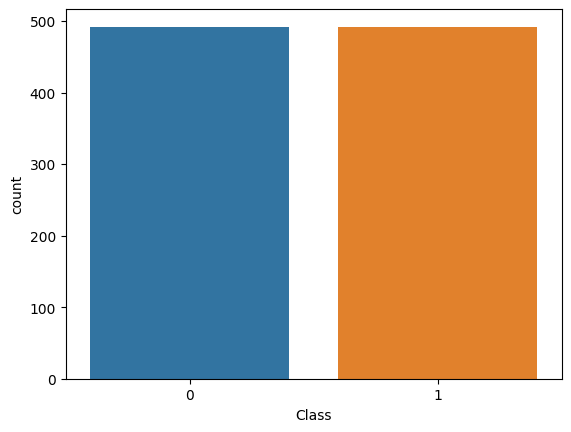

In [14]:
sns.countplot(x=new_creditcard_data["Class"])

In [15]:
#Linearity

<Axes: >

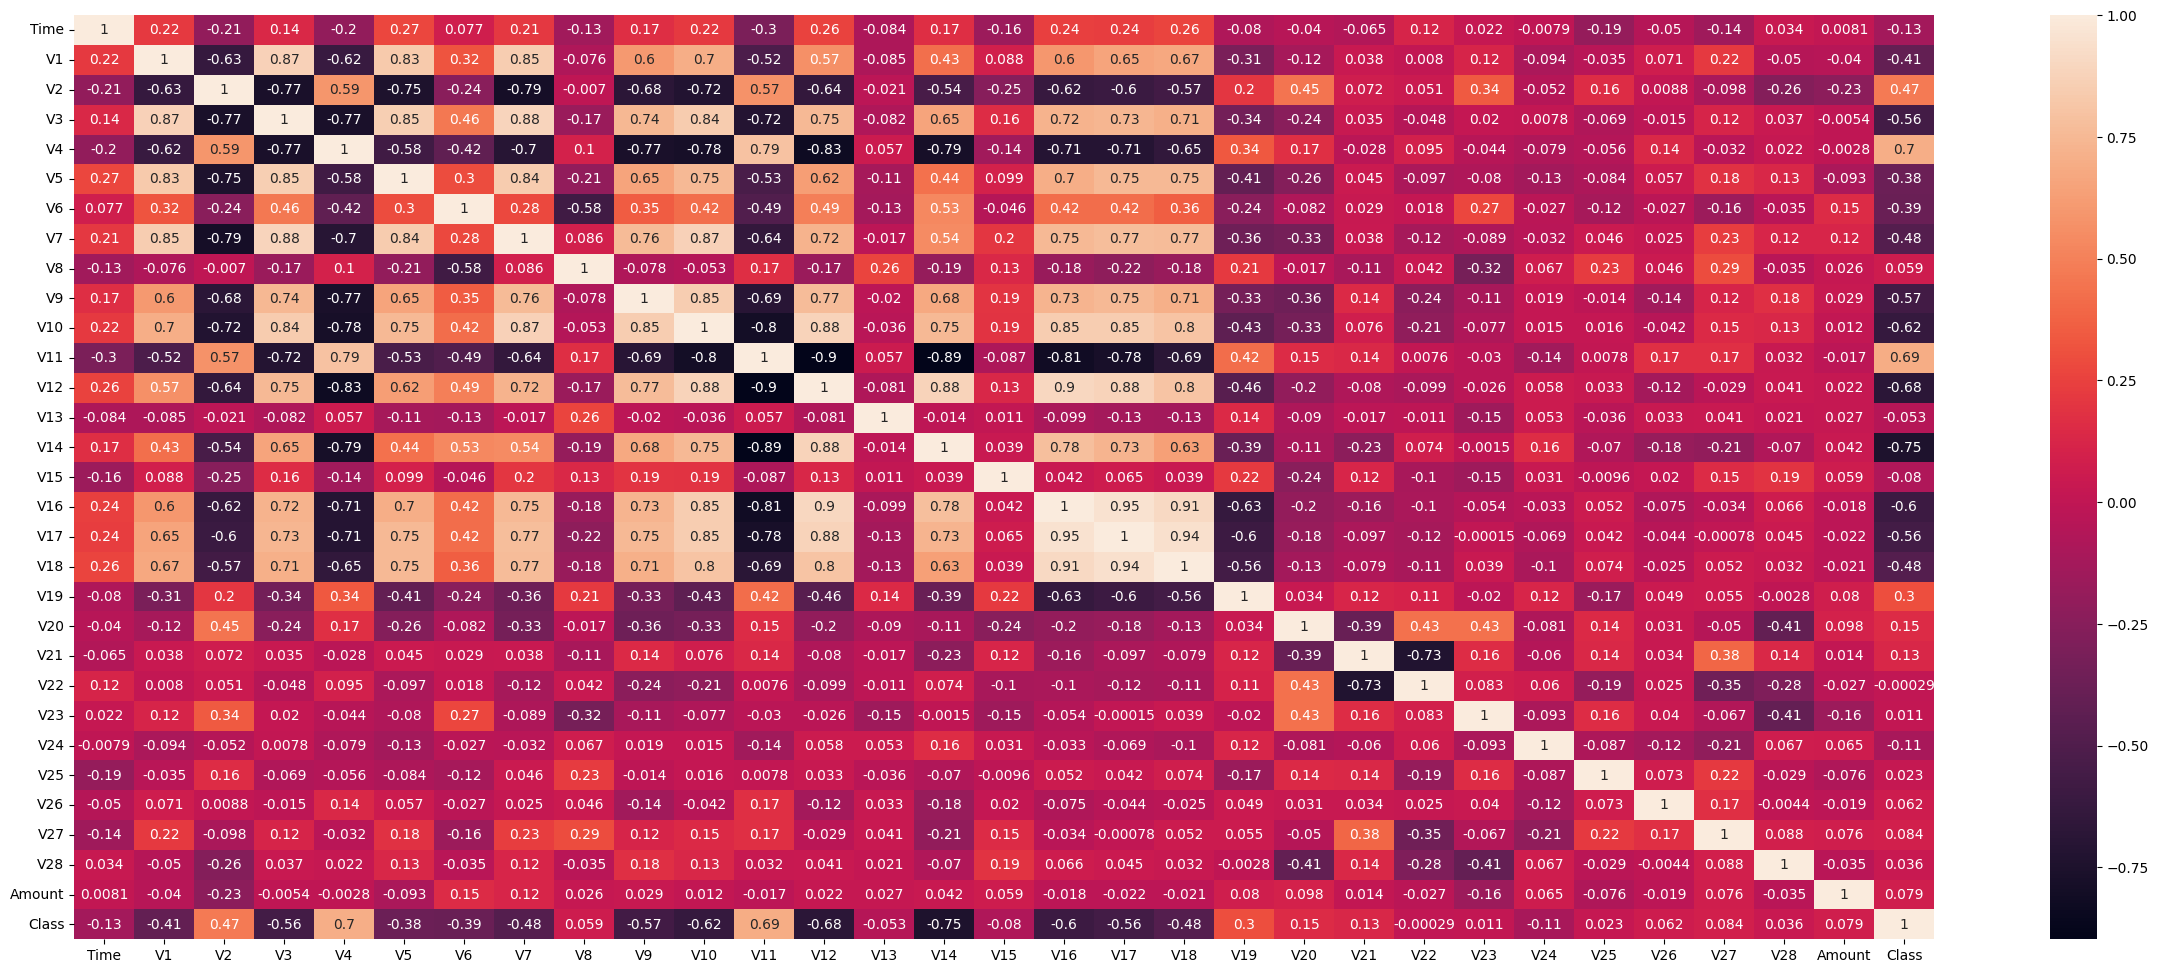

In [16]:
new_creditcard_data.corr()
plt.figure(figsize=(30,12))
sns.heatmap(new_creditcard_data.corr(),annot = True)

In [17]:
new_creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
103891,68838.0,1.196824,0.112449,0.395657,0.568538,-0.487342,-0.987957,0.122902,-0.251922,0.014150,...,-0.058702,-0.208224,-0.017664,0.441753,0.365791,0.386436,-0.044166,0.020639,39.99,0
205356,135709.0,-11.929055,1.369548,-7.956738,0.605734,-3.037809,0.514492,4.032042,-0.638698,6.178566,...,-2.393934,0.109561,-2.537429,0.432078,0.659209,-0.757639,0.144544,2.298763,468.07,0
4551,3871.0,-0.566315,0.621743,2.141567,0.571722,0.209164,0.138767,0.599055,-0.120860,0.962735,...,-0.330677,-0.540269,-0.243881,-0.054719,0.230514,0.341031,-0.179106,-0.173859,38.12,0
31615,36434.0,-0.758876,0.635399,2.799655,0.056063,-0.239313,0.385608,0.292102,0.100475,0.338761,...,-0.097992,0.192122,-0.247446,0.133419,0.155935,0.366030,0.152818,-0.087579,15.09,0
34820,37839.0,-0.680433,0.145872,2.640218,1.678270,-1.350700,1.745251,-0.075403,0.489720,0.717410,...,0.164138,1.033978,-0.019911,0.294647,-0.559628,-0.199866,0.237836,0.133441,153.80,0


In [18]:
new_creditcard_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [19]:
new_creditcard_data['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [20]:
new_creditcard_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93545.652439,-0.058273,-0.119496,-0.018998,0.041467,0.014059,-0.075092,0.001809,0.002543,0.099777,...,-0.013499,-0.023485,0.014718,-0.071361,0.01967,0.009893,-0.007778,0.001062,0.030719,86.836118
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


SPLITTING DATA INTO FEATURES AND TARGETS

In [21]:
X = new_creditcard_data.drop(columns='Class', axis=1)
Y = new_creditcard_data['Class']

In [22]:
print(X)

            Time         V1        V2        V3        V4        V5        V6  \
103891   68838.0   1.196824  0.112449  0.395657  0.568538 -0.487342 -0.987957   
205356  135709.0 -11.929055  1.369548 -7.956738  0.605734 -3.037809  0.514492   
4551      3871.0  -0.566315  0.621743  2.141567  0.571722  0.209164  0.138767   
31615    36434.0  -0.758876  0.635399  2.799655  0.056063 -0.239313  0.385608   
34820    37839.0  -0.680433  0.145872  2.640218  1.678270 -1.350700  1.745251   
...          ...        ...       ...       ...       ...       ...       ...   
279863  169142.0  -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0   1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0  -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0  -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0   1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8 

In [23]:
print(Y)

103891    0
205356    0
4551      0
31615     0
34820     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


SPLITTING THE DATA INTO TRAINING DATA AND TEST DATA

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [25]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


In [26]:
print(Y.shape,Y_train.shape,Y_test.shape)

(984,) (787,) (197,)


TRANING CLASSIFICATION ALGORITHM(LOGISTICS REGRESSION)

In [27]:
classifier = LogisticRegression()

In [28]:
classifier.fit(X_train, Y_train)

LogisticRegression()

MODEL PERFORMANCE

In [29]:
X_train_pred = classifier.predict(X_train)
classification_report_str = classification_report(X_train_pred, Y_train)
precision = precision_score(X_train_pred, Y_train)
recall = recall_score(X_train_pred, Y_train)
f1 = f1_score(X_train_pred, Y_train)
conf_matrix = confusion_matrix(X_train_pred, Y_train)

In [30]:
print("Classification Report:\n", classification_report_str)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92       415
           1       0.89      0.94      0.91       372

    accuracy                           0.91       787
   macro avg       0.91      0.91      0.91       787
weighted avg       0.92      0.91      0.91       787

Precision: 0.8857868020304569
Recall: 0.9381720430107527
F1-Score: 0.9112271540469975
Confusion Matrix:
 [[370  45]
 [ 23 349]]


In [31]:
X_test_pred = classifier.predict(X_test)
classification_report_str = classification_report(X_test_pred, Y_test)
precision = precision_score(X_test_pred, Y_test)
recall = recall_score(X_test_pred, Y_test)
f1 = f1_score(X_test_pred, Y_test)
conf_matrix = confusion_matrix(X_test_pred, Y_test)

In [32]:
print("Classification Report:\n", classification_report_str)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91       110
           1       0.85      0.95      0.90        87

    accuracy                           0.90       197
   macro avg       0.90      0.91      0.90       197
weighted avg       0.91      0.90      0.90       197

Precision: 0.8469387755102041
Recall: 0.9540229885057471
F1-Score: 0.8972972972972973
Confusion Matrix:
 [[95 15]
 [ 4 83]]


In [33]:
#Confusion Matrix

<Axes: >

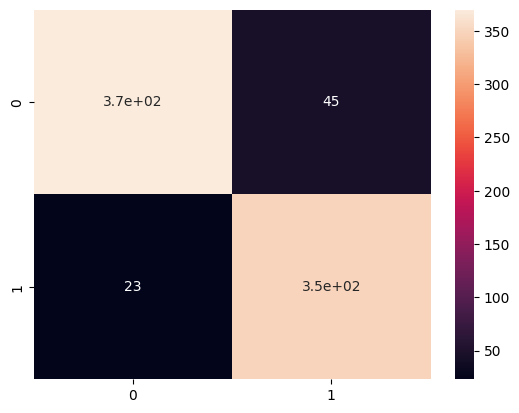

In [34]:
conf_matrix = confusion_matrix(X_train_pred,Y_train)
sns.heatmap(conf_matrix,annot=True)